## Image classificatrion using CIFAR - 10 Dataset in Tensorflow

In [2]:
# importing liberaries 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.models import ModelInput, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import 0.
from tensorflow.keras.layers import Model

In [4]:
# knowing the version of tf
print(tf.__version__)    

2.5.0


In [5]:
# now as we know the CIFAR - 10  dataset is available in the tensorflow keras API so we will directly load the data 
# loding the data 
cifar10 = tf.keras.datasets.cifar10

In [6]:
# Distributing the dataset for training and testing 
(a_train,b_train), (a_test,b_test) = cifar10.load_data()
print(a_train.shape, b_train.shape, a_test.shape,b_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


### by the output we can see there are 50000 training images and 10000 test images and images are of size 32 by 32

Now we cannot send the data directly to our own neutral network so we need to process that data in order to send the data.
First we will reduse the pixcel values. currently the range of pixcel are fron 1 to 256 so will reduse it the range 0 to 1. To reduse the size we will simply devide by 255.
We are doing this becouse it we help our model to do esily track the data and it's training will be more efficient.

In [7]:
# reducing the pixcel size  
a_train, a_test = a_train / 255.0, a_test / 255.0

Another thing we want to do is that we will rearrange the simple words in form of rows and it can be donn using the flatten() function 

In [8]:
# flatting the label values 
b_train,b_test = b_train.flatten(),b_test.flatten()

### let's see few images from our dataset using  subplot. As we know now that the size of the images is 32x32 so we can't see all images 
---



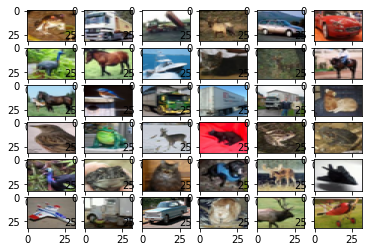

In [9]:
# vizualizing the data 
fig,xy = plt.subplots(6,6)
k = 0
for i in range(6):
  for j in range(6):
    xy[i][j].imshow(a_train[k],aspect='auto')
    k += 1

plt.show()

Though the images are not clear but we can identify the object. 

Now it's time to build our model. Here we are going to use CNN i.e Convolutional Neutral Network to train our model. It includes the convolutional layer in which there is conv2Dlayer,pooling and normalization method.Than we will pass it to dense layer than the another dense layer which is our last layer of the model. here we will use relu as activation function and in final layer we will use softmax layer

In [10]:
#number of classes
K = len(set(b_train))
#calculating total number of classes for the output layer 
print("number of classes:",K)

number of classes: 10


In [11]:
# bulding aur model using fuctional API
# building first/input  layer
i = Input(shape=a_train[0].shape)
x = Conv2D(32, (3,3,), activation = 'relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3,), activation = 'relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3,), activation = 'relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3,), activation = 'relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3,), activation = 'relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3,), activation = 'relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# second layer/first hidden layer 
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)

# third layer/second hidden layer/output layer
x = Dense(K,activation='softmax')(x)


model = Model(i,x)

#model description
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

Now our model is ready to compile and we will use model.compile() funtion for this
For parameters we will use 
. matrices for accuracy 
. sparse categorical crossentropy as loss fuction
. adam optimizer

In [12]:
#compiling our model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
               metrics =['accuracy'])  

now its time to fit our model for this we will use the model.fit() and we pass the data all into it. Now we will train our data till 10 epochs,it will give us fair result i guess

In [13]:
# fitting the model
F = model.fit(
    a_train, b_train, validation_data=(a_test, b_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 446s 285ms/step - loss: 1.3091 - accuracy: 0.5455 - val_loss: 1.1956 - val_accuracy: 0.5902
Epoch 2/10
1563/1563 [==============================] - 438s 281ms/step - loss: 0.8463 - accuracy: 0.7057 - val_loss: 0.8734 - val_accuracy: 0.6979
Epoch 3/10
1563/1563 [==============================] - 439s 281ms/step - loss: 0.6937 - accuracy: 0.7594 - val_loss: 0.7307 - val_accuracy: 0.7495
Epoch 4/10
1563/1563 [==============================] - 434s 278ms/step - loss: 0.5883 - accuracy: 0.7990 - val_loss: 0.6601 - val_accuracy: 0.7796
Epoch 5/10
1563/1563 [==============================] - 436s 279ms/step - loss: 0.4969 - accuracy: 0.8302 - val_loss: 0.7589 - val_accuracy: 0.7529
Epoch 6/10
1563/1563 [==============================] - 435s 278ms/step - loss: 0.4181 - accuracy: 0.8576 - val_loss: 0.8244 - val_accuracy: 0.7622
Epoch 7/10
1563/1563 [==============================] - 434s 278ms/step - loss: 0.3548 - accuracy: 0.8775 - val_

Now our model is trained though it will work fine but we want more accuracy so we will add the data.augmantation and tain it again. We will fit the data again my calling model.fit on augmanted data and we will fit our mofel at batch size of 32 and we change the range of height and width by 0.1 than we will call the data ahain for 10 epochs

In [16]:
#fitting with data augmentation 
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True)

train_generator = data_generator.flow(a_train,b_train,batch_size)
steps_per_epoch = a_train.shape[0]//batch_size

F = model.fit(train_generator, validation_data=(a_test, b_test),
              steps_per_epoch=steps_per_epoch, epochs=10)

Epoch 1/10
1562/1562 [==============================] - 452s 289ms/step - loss: 0.6319 - accuracy: 0.7913 - val_loss: 0.5711 - val_accuracy: 0.8183
Epoch 2/10
1562/1562 [==============================] - 453s 290ms/step - loss: 0.5431 - accuracy: 0.8167 - val_loss: 0.5185 - val_accuracy: 0.8253
Epoch 3/10
1562/1562 [==============================] - 453s 290ms/step - loss: 0.5043 - accuracy: 0.8286 - val_loss: 0.5601 - val_accuracy: 0.8122
Epoch 4/10
1562/1562 [==============================] - 452s 289ms/step - loss: 0.4745 - accuracy: 0.8385 - val_loss: 0.5540 - val_accuracy: 0.8181
Epoch 5/10
1562/1562 [==============================] - 454s 291ms/step - loss: 0.4486 - accuracy: 0.8478 - val_loss: 0.5509 - val_accuracy: 0.8212
Epoch 6/10
1562/1562 [==============================] - 449s 287ms/step - loss: 0.4319 - accuracy: 0.8530 - val_loss: 0.5478 - val_accuracy: 0.8198
Epoch 7/10
1562/1562 [==============================] - 449s 288ms/step - loss: 0.4171 - accuracy: 0.8576 - val_

Now as are model is trained so we will check it's accuracy by plotting it's graph

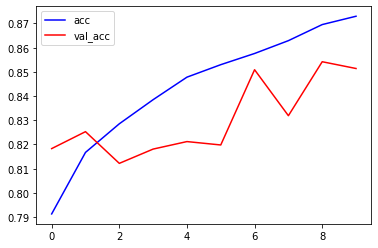

In [19]:
plt.plot(F.history['accuracy'], label='acc', color='blue')
plt.plot(F.history['val_accuracy'], label='val_acc', color='red')
plt.legend()

It's time to make pridiction of our model using model.pridict() function but before that we need to reduce the pixcel value to 0 to 1 and it's shape to (1,32,32,3) becouse it will excpect in that form only. here we will use the image from dataset only becouse we can campare the pridicted output and orignal output.

Original label is cat and predicted label is cat


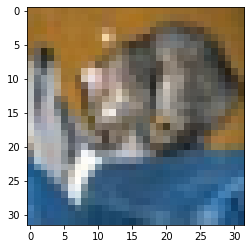

In [21]:
# mapping the lables
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
# selecting the image from test dataset
image_number = 0
#displaying the image
plt.imshow(a_test[image_number])
#lodding the image in an array
n = np.array(a_test[image_number])
# reshaping the loaded image
p = n.reshape(1, 32, 32, 3)
# passing  in the network for prediction and saveing  the predicted label
predicted_label = labels[model.predict(p).argmax()]
#loading the orignal label
original_label = labels[b_test[image_number]]
# displaying the output
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

now we will save our model using model.save()

In [22]:
# save the model
model.save('Image classificatrion using CIFAR - 10 Dataset in Tensorflow')

INFO:tensorflow:Assets written to: Image classificatrion using CIFAR - 10 Dataset in Tensorflow/assets
